In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Prepare The Data

In [27]:
#load the dataset
dataset = pd.read_excel('./online_retail_II.xlsx')


In [28]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
#removing unnecessary columns 
# Drop Columns 
new_data_set = dataset.drop(columns=['StockCode', 'Price', 'Customer ID', 'Country'])

# Drop the Empty raws
new_data_set.dropna(inplace=True)
print(f'We have drop {dataset.shape[0]-new_data_set.shape[0]} empty rows')

#Save The new Dataset 
# new_data_set.to_csv('basket.csv',index=True)




We have drop 2928 empty rows


In [35]:
new_data_set.describe(include="all")

,Invoice,Description,Quantity,InvoiceDate
count,522533.0,522533,522533.000000,522533
unique,25888.0,4681,NaN,NaN
top,537434.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN
freq,675.0,3549,NaN,NaN
mean,NaN,NaN,10.514312,2010-06-28 16:48:16.663903744
min,NaN,NaN,-9360.000000,2009-12-01 07:45:00
25%,NaN,NaN,1.000000,2010-03-21 14:55:00
50%,NaN,NaN,3.000000,2010-07-06 13:13:00
75%,NaN,NaN,10.000000,2010-10-15 13:37:00
max,NaN,NaN,19152.000000,2010-12-09 20:01:00


In [92]:
# Converting the 'date_time' column into the right format
new_data_set['InvoiceDate'] = pd.to_datetime(new_data_set['InvoiceDate'])

# Round the datetime to the nearest hour
new_data_set['Hour'] = new_data_set['InvoiceDate'].dt.floor('H').dt.hour

# Create the hour intervals
new_data_set['HourInterval'] = new_data_set['Hour'].astype(str) + '-' + (new_data_set['Hour'] + 1).astype(str)
# Extract time of day
new_data_set['period_day'] = new_data_set['InvoiceDate'].apply(lambda x: 'Morning' if 6 <= x.hour < 12 else ('Afternoon' if 12 <= x.hour < 18 else 'Night'))

# Identify weekends
new_data_set['Weekend'] = new_data_set['InvoiceDate'].dt.dayofweek.isin([5, 6]).map({True: 'Weekend', False: 'Weekday'})

# Add day of the week
new_data_set['Day'] = new_data_set['InvoiceDate'].dt.strftime('%A')  # name of the day

# Add mounth
new_data_set['Month'] = new_data_set['InvoiceDate'].dt.month_name()



# cleaning the item column
new_data_set['Description'] = new_data_set['Description'].str.strip()
new_data_set['Description'] = new_data_set['Description'].str.lower()

new_data_set.head(15)

,Invoice,Description,Quantity,InvoiceDate,period_day,Weekend,DayOfWeek,Day,MonthName,Month,Hour,HourInterval
0,489434,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
1,489434,pink cherry lights,12,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
2,489434,white cherry lights,12,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
3,489434,"record frame 7"" single size",48,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
4,489434,strawberry ceramic trinket box,24,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
5,489434,pink doughnut trinket pot,24,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
6,489434,save the planet mug,24,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
7,489434,fancy font home sweet home doormat,10,2009-12-01 07:45:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
8,489435,cat bowl,12,2009-12-01 07:46:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8
9,489435,"dog bowl , chasing ball design",12,2009-12-01 07:46:00,Morning,Weekday,Tuesday,Tuesday,December,December,7,7-8


In [93]:
new_data_set.to_csv('basket.csv',index=True)

## Visualization

In [94]:
# Load the data
data = pd.read_csv('./basket.csv')

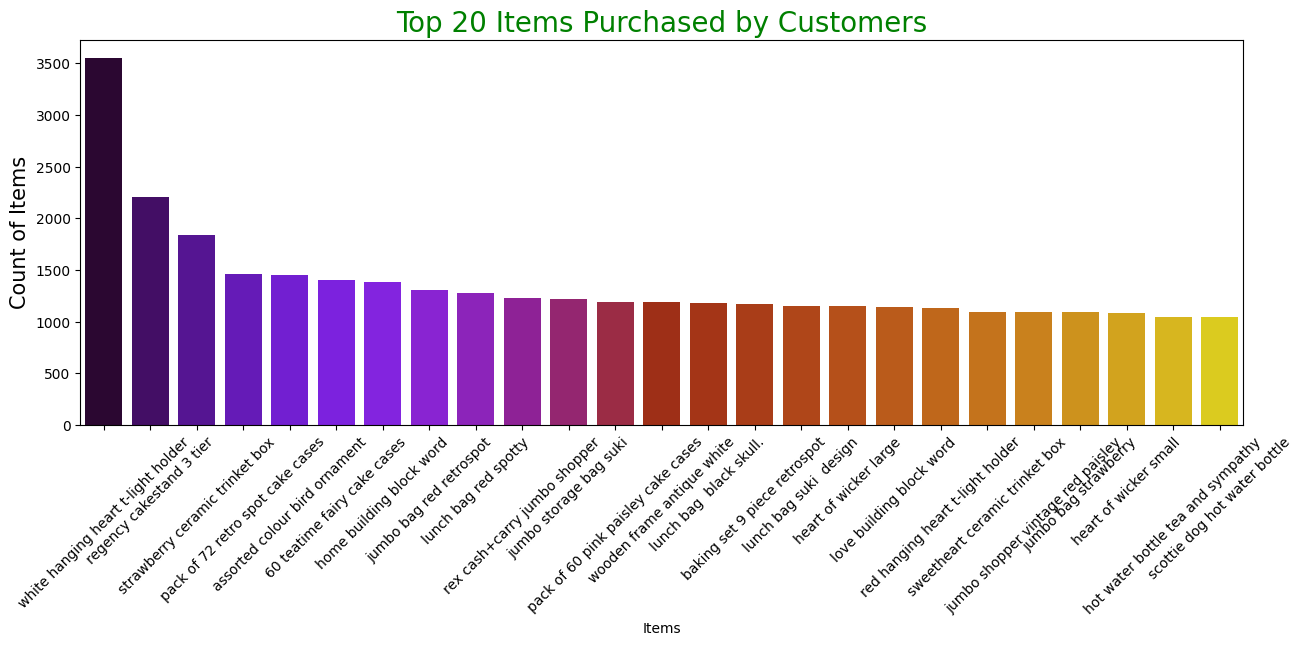

In [74]:

plt.figure(figsize=(15, 5))
sns.barplot(x=data.Description.value_counts().head(25).index,
            y=data.Description.value_counts().head(25).values,
            hue=data.Description.value_counts().head(25).index,  # Assign 'x' to 'hue'
            palette='gnuplot',
            legend=False)

plt.xlabel('Items', size=10)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size=15)
plt.title('Top 20 Items Purchased by Customers', color='green', size=20)

plt.show()


In [118]:
top_descriptions = data['Description'].value_counts().head(25)
highest_item = top_descriptions.idxmax()
lowest_item = top_descriptions.idxmin()
print(f"The most buyed product item is: {highest_item} , and The 25th most buyed product item is: {lowest_item}")

The most buyed product item is: white hanging heart t-light holder , and The 20th most buyed product item is: scottie dog hot water bottle


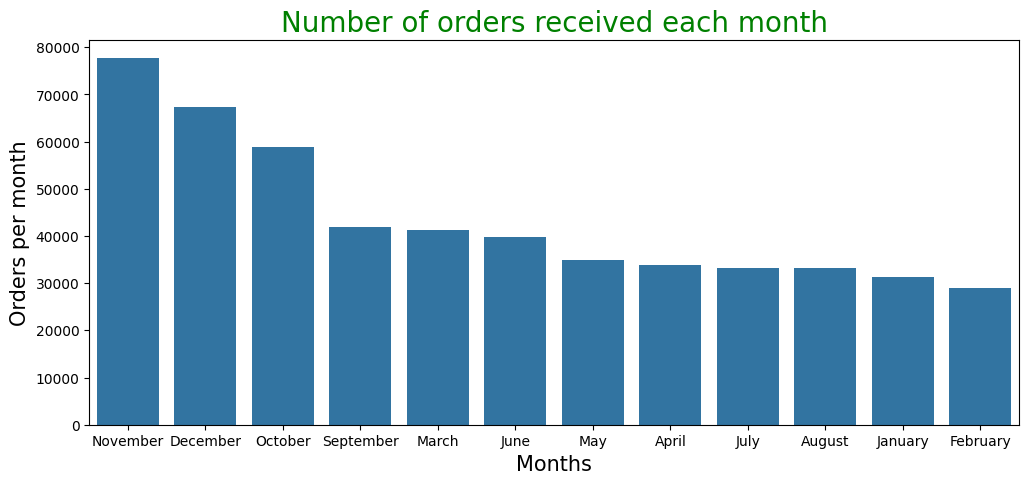

In [85]:
monthTran = data.groupby('Month')['Invoice'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)
# To order the barplot by the highest number of orders
monthTran = monthTran.sort_values("Invoice", ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "Month", y = "Invoice")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

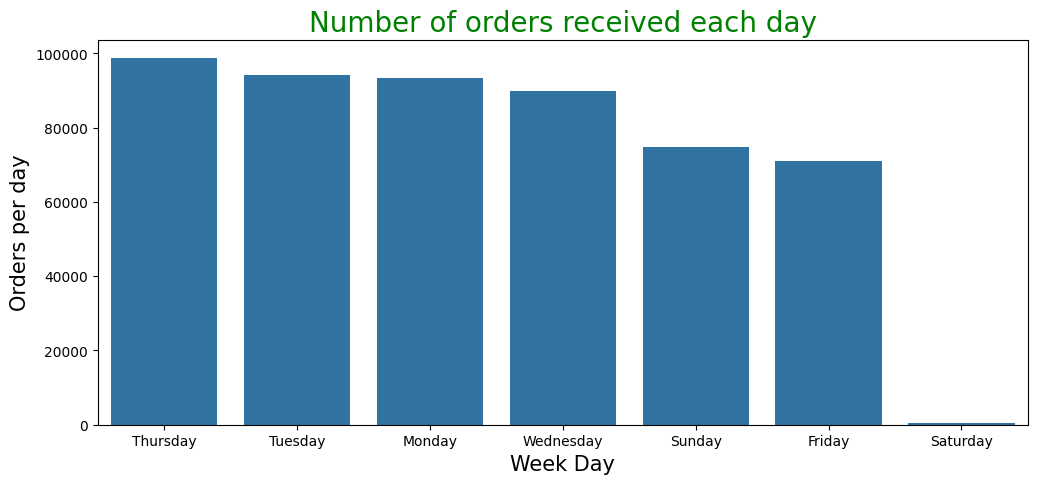

In [88]:
weekTran = data.groupby('Day')['Invoice'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

# To order the barplot by the highest number of orders
weekTran = weekTran.sort_values("Invoice", ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "Day", y = "Invoice")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

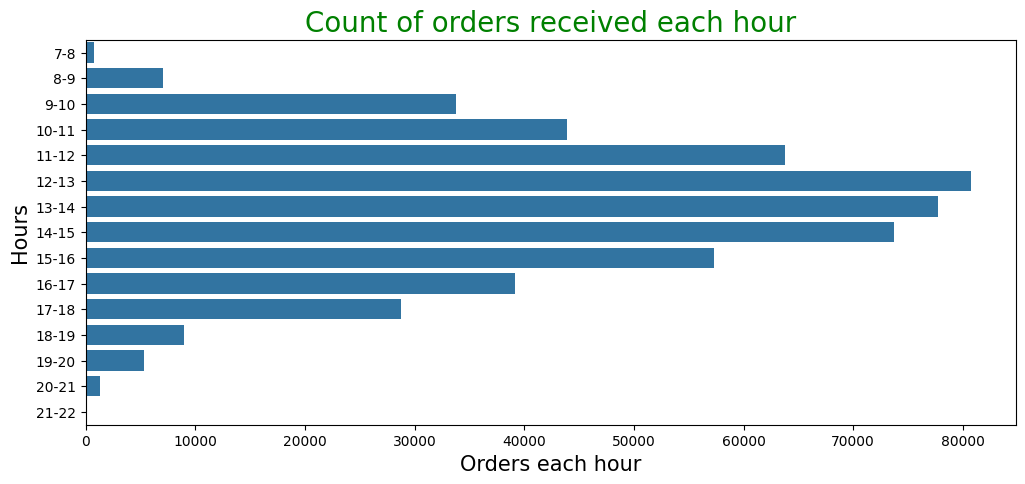

In [113]:
hourTran = data.groupby('HourInterval')['Invoice'].count().reset_index()
hourTran.loc[:,"hourorder"] = [4,5,6,7,8,9,10,11,12,13,14,15,1,2,3]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Invoice", y = "HourInterval")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

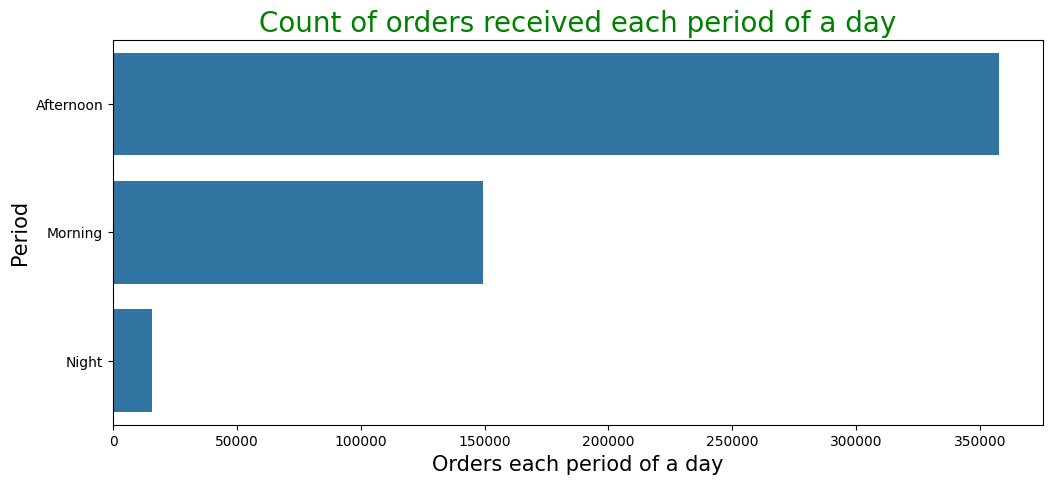

In [115]:
dayTran = data.groupby('period_day')['Invoice'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Invoice", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [124]:
top_period_day = data['period_day'].value_counts().head()
top_HourInterval = data['HourInterval'].value_counts().head()
highest_period_day = top_period_day.idxmax()
highest_HourInterval= top_HourInterval.idxmax()
print(f"People order more during the {highest_period_day}, between {highest_HourInterval}")

People order more during the Afternoon, between 12-13


## Apriori Algorithm

In [135]:
from mlxtend.frequent_patterns import association_rules, apriori

In [148]:
# Reduice the dataset because MemoryError ,
df = pd.read_csv('./basket.csv', nrows=50000)


In [149]:
transactions_str = df.groupby(['Invoice', 'Description'])['Description'].count().reset_index(name ='Count')
transactions_str

,Invoice,Description,Count
0,489434,15cm christmas glass ball 20 lights,1
1,489434,fancy font home sweet home doormat,1
2,489434,pink cherry lights,1
3,489434,pink doughnut trinket pot,1
4,489434,"record frame 7"" single size",1
...,...,...,...
48889,C493940,yellow red flower piggy bank,1
48890,C493984,fairy cake candles,1
48891,C493986,retro spot cake stand,1
48892,C493986,white orchid flower lights,1


In [150]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Invoice', columns='Description', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Description,*usb office glitter lamp,*usb office mirror ball,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 mini toadstool pegs,12 pencil small tube woodland,12 pencils small tube posy,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Applying the function to the dataset using the map method
my_basket_sets = my_basket.apply(lambda x: x.map(encode))

my_basket_sets.head()



Description,*usb office glitter lamp,*usb office mirror ball,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 mini toadstool pegs,12 pencil small tube woodland,12 pencils small tube posy,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

c:\Users\alhejazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.015164,(12 ass zinc christmas decorations)
1,0.027380,(12 pencils small tube red spotty)
2,0.021061,(12 pencils small tube skull)
3,0.021904,(12 pencils tall tube red spotty)
4,0.024010,(12 pencils tall tube skulls)
...,...,...
5242,0.010110,"(red spotty charlotte bag, suki shoulder bag,..."
5243,0.010110,"(vintage heads and tails card game, strawberry..."
5244,0.010110,"(red spotty charlotte bag, suki shoulder bag,..."
5245,0.010110,"(charlotte bag , suki design, strawberry ceram..."


In [153]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26266,"(charlotte bag , suki design, pink heart dots ...","(dotcom postage, paper chain kit 50's christma...",0.010531,0.010952,0.010531,1.000000,91.307692,0.010415,inf,0.999574
58582,"(strawberry ceramic trinket box, paper chain k...",(vintage snap cards),0.010110,0.042123,0.010110,1.000000,23.740000,0.009684,inf,0.967660
28500,"(wooden box of dominoes, charlotte bag , suki ...",(hot water bottle tea and sympathy),0.010110,0.088880,0.010110,1.000000,11.251185,0.009211,inf,0.920426
28498,"(hot water bottle tea and sympathy, wooden box...",(pink heart dots hot water bottle),0.010110,0.028222,0.010110,1.000000,35.432836,0.009824,inf,0.981702
28486,"(charlotte bag , suki design, pink heart dots ...","(hot water bottle tea and sympathy, strawberry...",0.010531,0.010952,0.010531,1.000000,91.307692,0.010415,inf,0.999574
...,...,...,...,...,...,...,...,...,...,...
9747,(white hanging heart t-light holder),"(wooden picture frame white finish, pink cherr...",0.153328,0.011373,0.010110,0.065934,5.797314,0.008366,1.058412,0.977363
10491,(white hanging heart t-light holder),"(tea bag plate red spotty, scottie dog hot wat...",0.153328,0.014743,0.010110,0.065934,4.472214,0.007849,1.054804,0.916998
3651,(white hanging heart t-light holder),"(pack of 72 retro spot cake cases, antique sil...",0.153328,0.013058,0.010110,0.065934,5.049273,0.008107,1.056608,0.947181
2576,(white hanging heart t-light holder),(red spotty oven glove double),0.153328,0.026116,0.010110,0.065934,2.524637,0.006105,1.042628,0.713267


In [154]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26266,"(charlotte bag , suki design, pink heart dots ...","(dotcom postage, paper chain kit 50's christma...",0.010531,0.010952,0.010531,1.000000,91.307692,0.010415,inf,0.999574
39883,"(baking set 9 piece retrospot, pink heart dots...","(hot water bottle tea and sympathy, strawberry...",0.010110,0.027801,0.010110,1.000000,35.969697,0.009828,inf,0.982128
39756,"(hot water bottle tea and sympathy, baking set...","(strawberry ceramic trinket box, pink heart do...",0.010110,0.013901,0.010110,1.000000,71.939394,0.009969,inf,0.996170
39757,"(hot water bottle tea and sympathy, baking set...","(dotcom postage, strawberry ceramic trinket box)",0.010110,0.011794,0.010110,1.000000,84.785714,0.009990,inf,0.998298
39758,"(hot water bottle tea and sympathy, baking set...","(strawberry ceramic trinket box, sandwich bath...",0.010110,0.013901,0.010110,1.000000,71.939394,0.009969,inf,0.996170
...,...,...,...,...,...,...,...,...,...,...
12704,(white hanging heart t-light holder),"(pack of 72 retro spot cake cases, baking set ...",0.153328,0.013058,0.010110,0.065934,5.049273,0.008107,1.056608,0.947181
7293,(white hanging heart t-light holder),"(pack of 72 retro spot cake cases, full englis...",0.153328,0.012637,0.010110,0.065934,5.217582,0.008172,1.057059,0.954726
7191,(white hanging heart t-light holder),"(white skull hot water bottle, fawn blue hot w...",0.153328,0.016428,0.010110,0.065934,4.013525,0.007591,1.053001,0.886816
10437,(white hanging heart t-light holder),"(sandwich bath sponge, watermelon bath sponge)",0.153328,0.017692,0.010110,0.065934,3.726845,0.007397,1.051648,0.864179


In [155]:
rules.to_csv('Output.csv',index=True)